* David Araujo 1671077
* Eloi Mercader 1666675
* Enric Ortega 1672973

# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

In [1]:
#Importem la regressio lineal aixi com pandas i numpy
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, average_precision_score

path = "C:/Users/enric/OneDrive/Escritorio/3R DE MATCAD/1R SEMESTRE/APC/PRÀCTIQUES/SESSIO2/APC_Practica_1_2024ipynb/trainbo.csv"
df = pd.read_csv(path)

### 1. EDA (exploratory data analysis) (1 punt)

Abans de res cal sempre veure com es la base de dades asignada?

**Pregunta 1.1.**

* Quants atributs té la vostra base de dades? 
Té 12 atributs.
* Quin tipus d'atributs tens? 
(Númerics, temporals, categorics, binaris...) Numerics i categorics
* Com es el target, quantes categories diferents existeixen? 
És binari (1 si va sobreviure i 0 si no)


In [2]:
#Mirem el dataset
print(df.shape[1])
print (df.keys())
#Mirem els tipus de les columnes
print (df.dtypes)
#Mirem el tamany
print (df.size)

#Mirem descripcio general
print (df.describe())
df.head()

12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
10692
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Pregunta 1.2.**
* Tenim nans en les dades? 
Sí tenim Nans a la base de dades.


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Percentatge de valors NaN per columna:
 Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


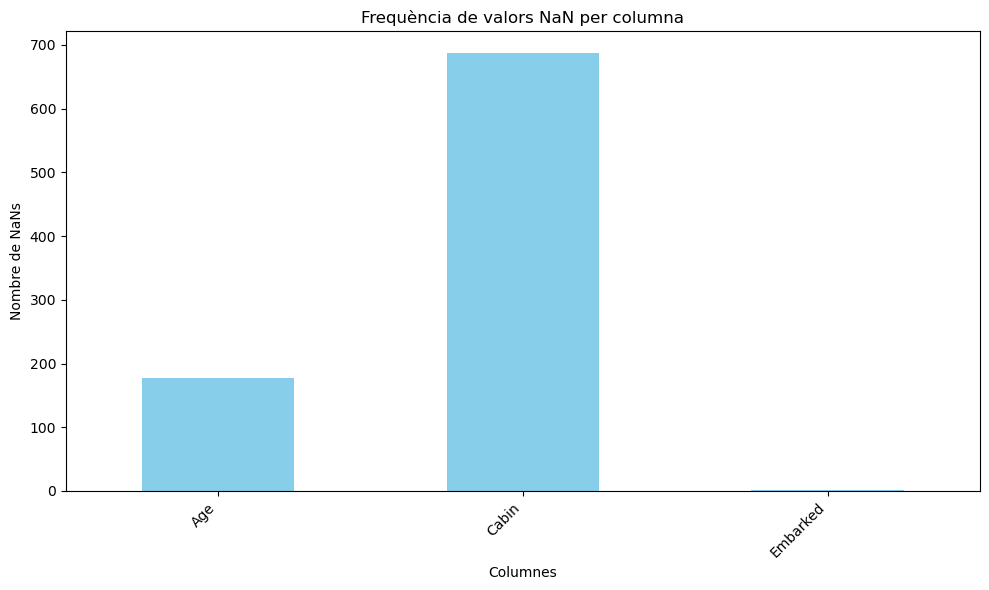

In [3]:
missing_values = df.isnull().sum()
print(missing_values)
missing_percentages = (missing_values / len(df)) * 100

print("Percentatge de valors NaN per columna:\n", missing_percentages[missing_percentages > 0])

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Frequència de valors NaN per columna')
plt.xlabel('Columnes')
plt.ylabel('Nombre de NaNs')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


Com podem veure la majoria de NaNs radiquen a la columna `Cabin` mentres que a `Embarked` són insignificants

Tot seguit apliquem label encoder per transformar les variables categòriques en numèriques.

In [4]:
numeric_features = df.select_dtypes(np.number).keys()
non_numeric = [k for k in df.keys() if k not in numeric_features]

In [5]:
df.loc[:,non_numeric] = df.loc[:,non_numeric].apply(LabelEncoder().fit_transform)
print (df.dtypes)
df.head()

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object


C:\Users\enric\AppData\Local\Temp\ipykernel_14204\4072738493.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,non_numeric] = df.loc[:,non_numeric].apply(LabelEncoder().fit_transform)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


**Pregunta 1.3.**
* Podeu veure alguna correlació entre X i y?

In [6]:
correlation_matrix = df.corr()

correlation_with_survived = correlation_matrix['Survived']

print("Correlacions de totes les variables amb 'Survived':")
print(correlation_with_survived)


Correlacions de totes les variables amb 'Survived':
PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Name          -0.057343
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Ticket        -0.164549
Fare           0.257307
Cabin         -0.254888
Embarked      -0.163517
Name: Survived, dtype: float64


* `Sex` (-0.543351): Les dones tenien una major probabilitat de sobreviure que els homes, ja que es va aplicar la política de "dones i nens primer".

* `Pclass` (-0.338481): Els passatgers de primera classe tenien una millor probabilitat de supervivència que els de tercera classe, gràcies al seu accés preferent als bots salvavides.

* `Fare` (0.257307): Els que van pagar més pel bitllet, sovint de classes superiors, tenien una probabilitat més alta de sobreviure.

* `Cabin` (-0.254888): Les cabines de classes inferiors, situades a les cobertes inferiors, van dificultar l'evacuació, reduint la seva probabilitat de supervivència.

* `Embarked` (-0.163517): Els passatgers que van embarcar a Cherbourg tenien una lleugerament millor probabilitat de supervivència, possiblement perquè més passatgers de primera classe van embarcar allà.

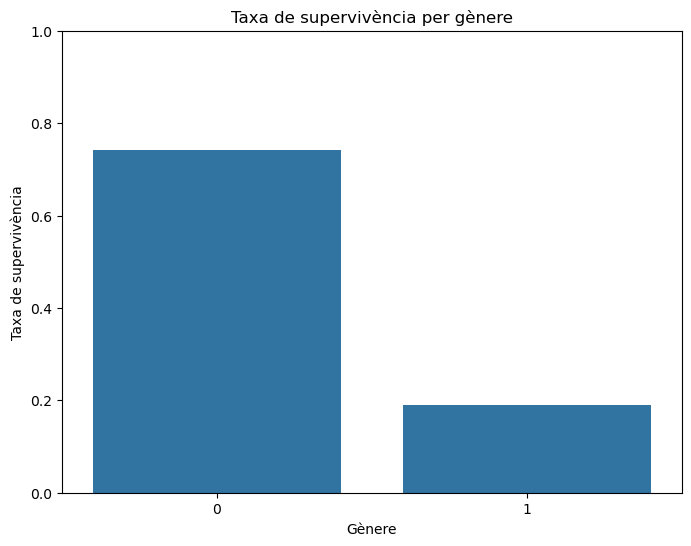

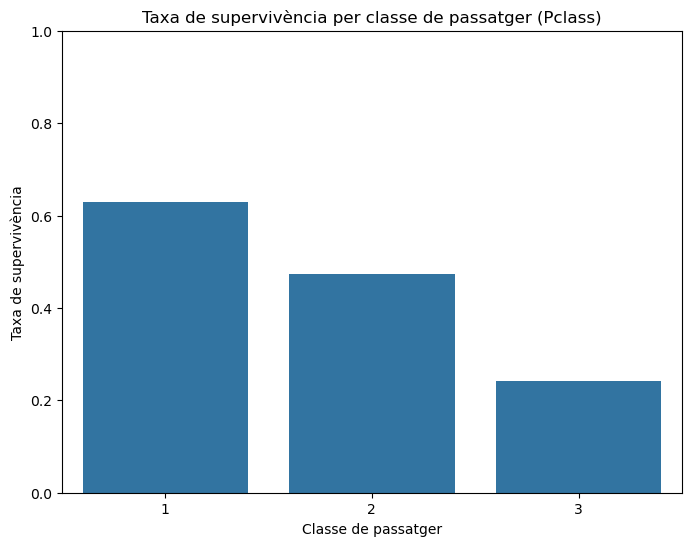

In [7]:
# Calcula la taxa de supervivència per gènere
gender_survival = df.groupby('Sex')['Survived'].mean().reset_index()

# Gràfic de la taxa de supervivència per gènere
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=gender_survival)
plt.title('Taxa de supervivència per gènere')
plt.ylabel('Taxa de supervivència')
plt.xlabel('Gènere')
plt.ylim(0, 1)
plt.show()

# Calcula la taxa de supervivència per classe de passatger
pclass_survival = df.groupby('Pclass')['Survived'].mean().reset_index()

# Gràfic de la taxa de supervivència per classe de passatger (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=pclass_survival)
plt.title('Taxa de supervivència per classe de passatger (Pclass)')
plt.ylabel('Taxa de supervivència')
plt.xlabel('Classe de passatger')
plt.ylim(0, 1)
plt.show()


Aquests gràfics escenifiquen l'esmentat anteriorment.

**Pregunta 1.4.**
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució? 

Hi ha un 38% de persones que no han sobreviscut per tant no estan balancejades

In [8]:
survived=df["Survived"].sum() #Mirem si  estan balancejades
print(survived)
percentatge=(survived/len(df))*100
print(percentatge)


342
38.38383838383838


### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Pregunta 2.1. :**
*  Teniu gaires dades sense informació (NaNs)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikitlearn.org/stable/modules/impute.html) 

Sí, les columnes `Age`, `Cabin` i `Embarked` tenen algun NaN en alguna instància de la base de dades. 

La filtració de NaNs pot aportar una simplificació del codi i del procés d'entrenament, la base de dades tindrà un conjunt de dades més consistent i de millor qualitat i hi haurà una major facilitat d'interpretar el model.

Sobretot les dues primeres variables tenen una quantitat considerable de NaNs, en el cas de la variable `Cabin` és tan considerable que hem optat per eliminar aquesta columna, ja que no aportarà cap informació. En el cas de la variable `Embarked` hi ha únicament dos NaNs, per tant, hem obtat per esborrar aquestes dues instàncies. Per últim, en la variable `Age` és on hem optat per aplicar dues tècniques que compararem per a reomplir aquests valors NaN, aquestes són el KNN i el Group By amb mitjana ponderada respecte les correlacions.


In [9]:
#Eliminem la columna Cabin
df=df.drop(columns=['Cabin'])

#Eliminem les instàncies en les que la columna Embarked té NaNs
df = df.dropna(subset=['Embarked'])

missing_values=df.isnull().sum() #Per mirar si hi ha nans
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Abans de continuar amb el procés de reassignació dels NaNs de la variable `Age`, caldrà aplicar normalització.

**Pregunta 2.2. :**

* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?

No, hi ha algunes dades que encara no han estat normalitzades. Sí, per exemple en columnes com `Age`, `Fare` i `SibSp`. Aquestes variables com són columnes numèriques, amb un rang molt variat de valors i sense cap significat semàntic, són les candidates perfectes per ser normalitzades.

El tipus de normalització que més encaixarà amb les nostres dades és la estandardització Z-Score Normalization. Aquesta és ideal per variables que podem tenir valors positius i negatius i per models de classificació.   

C:\Users\enric\AppData\Local\Temp\ipykernel_14204\1784432164.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=age_by_siblings_class, x="Pclass", y="Age", hue="SibSp", ci=None)


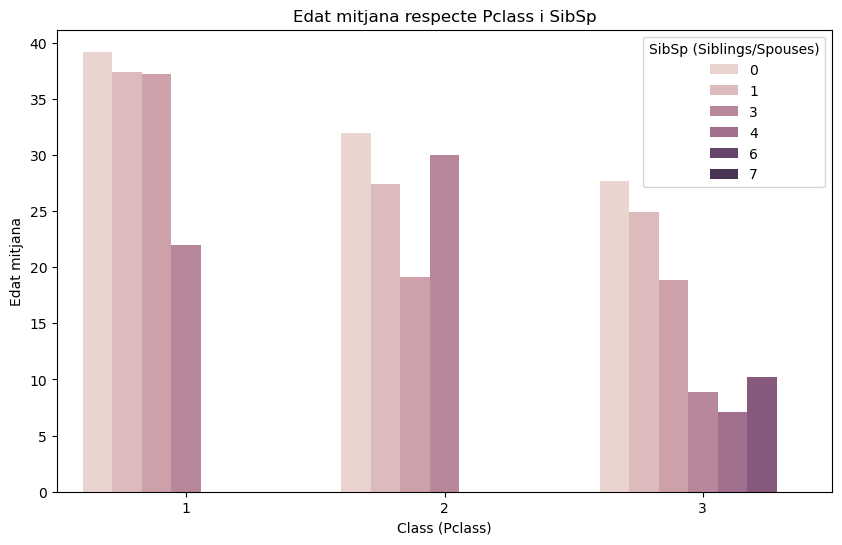

In [10]:
#Gràfic de barres de les variables SibSp i Pclass respecte Age
age_by_siblings_class = df.groupby(["SibSp", "Pclass"])["Age"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=age_by_siblings_class, x="Pclass", y="Age", hue="SibSp", ci=None)
plt.title("Edat mitjana respecte Pclass i SibSp")
plt.ylabel("Edat mitjana")
plt.xlabel("Class (Pclass)")
plt.legend(title="SibSp (Siblings/Spouses)")
plt.show()

Aquest gràfic ens servirà posteriorment per a una millor visualització del que farà el Group By quan es trobi amb un valor NaN en la variable `Age`.

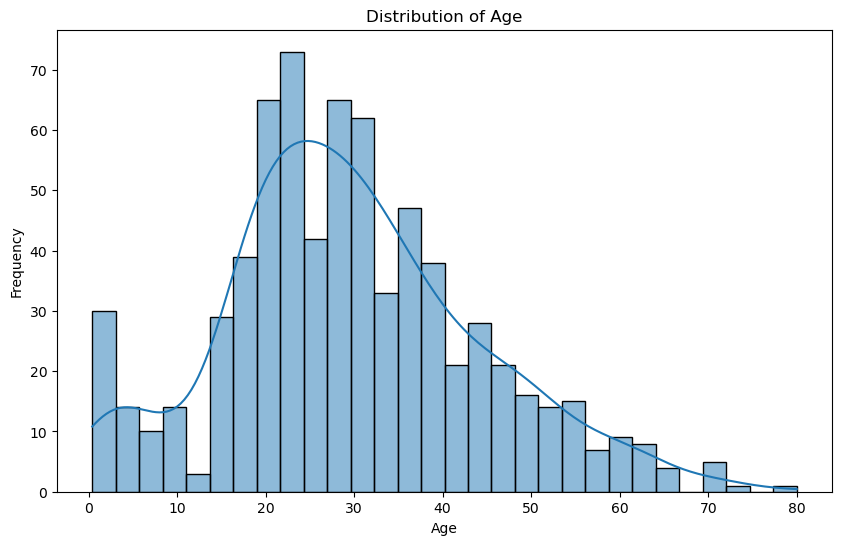

In [11]:


# Histograma de la variable Age abans de la normalització. 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:

scaler = StandardScaler()

columns_to_normalize = ['Age', 'Fare', 'SibSp']

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df[['Age', 'Fare','SibSp']].head())

        Age      Fare     SibSp
0 -0.530377 -0.502445  0.432793
1  0.571831  0.786845  0.432793
2 -0.254825 -0.488854 -0.474545
3  0.365167  0.420730  0.432793
4  0.365167 -0.486337 -0.474545


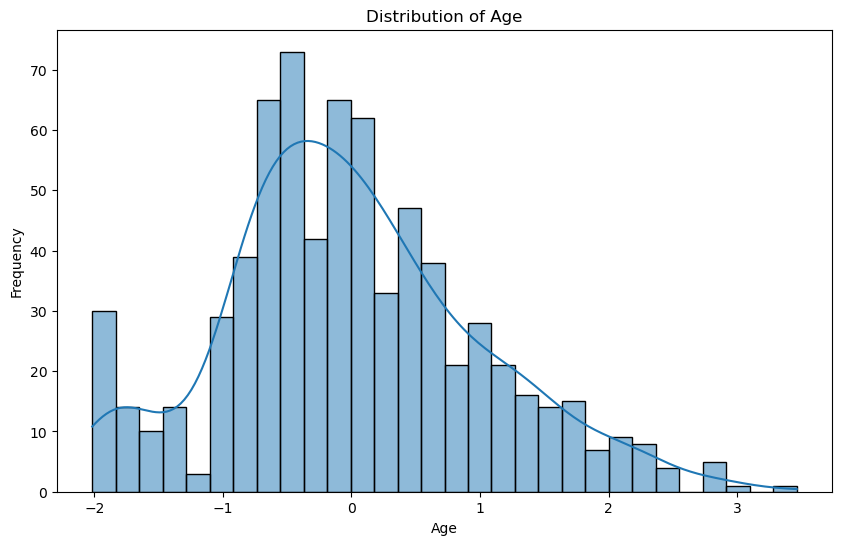

In [13]:


# Histograma de la variable Age després de la normalització. 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Com podem veure l'histograma de la variable `Age` és el mateix abans i després de normalitzar.

Per poder reassignar els valors NaNs de `Age` hem de veure els valors més rellevants per poder dictaminar `Age`, farem una matriu de correlació per veure quins son els atributs més rellevenants respecte aquesta variable.
Hem fet la matriu però no incloent tots els atributs, només els que poden ser rellevants a l'hora de dictaminar l'edat.

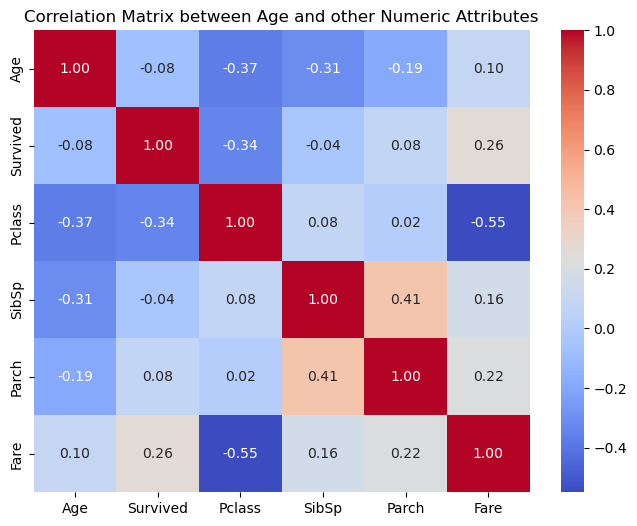

In [14]:

numeric_cols = df[['Age', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']]

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Age and other Numeric Attributes')
plt.show()

Un cop hem fet la matriu de correlació, veiem que les columnes amb més correlació amb la variable `Age`. Aquestes són `Pclass`, `SibSp` i `Parch`. Aquestes ens serviran ara per fer el Group By únicament respecte a aquestes variables.

A continuació compararem els dos mètodes per a la reassignació de dades NaN en la columna `Age`. Ens decidirem per un dels dos mètodes en funció del MAE (Mean Absolute Error) i del RMSE (Root Mean Squared Error).

Group By - MAE: 1.4939, RMSE: 1.8539
KNN Imputer - MAE: 2.4727, RMSE: 2.8184
El Group By ha predit millor la variable 'Age'.


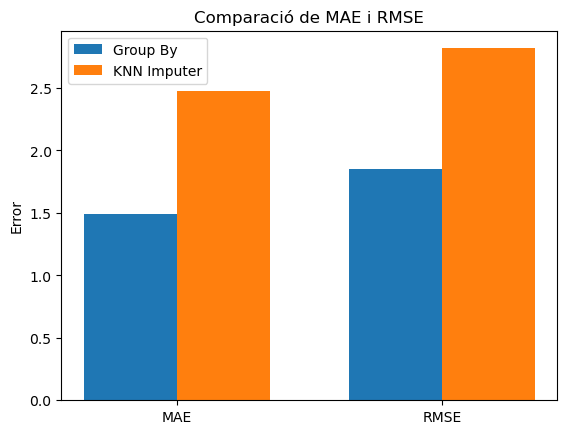

In [15]:


df_copy = df.copy()

# 1. Dividim el DataFrame entre els que tenen NaNs a "Age" i els que no.
df_with_age = df_copy[df_copy['Age'].notna()]  
df_without_age = df_copy[df_copy['Age'].isna()]  

train, test = train_test_split(df_with_age, test_size=0.3, random_state=33)

test_copy = test.copy()

# Ocultem els valors reals de "Age" a la còpia de test
test_copy['Age'] = np.nan

# 4. Recalcularem els valors de "Age" a test_copy usant el conjunt de train com a referència

# A. Mètode Group By (Promig ponderat segons correlacions)

correlation_matrix = train[['SibSp', 'Pclass', 'Parch', 'Age']].corr()
age_correlations = correlation_matrix['Age'].drop('Age').abs()  

# Normalitzem les correlacions perquè sumin 1 (això ens dona els pesos)
weights = age_correlations / age_correlations.sum()

# Funció per calcular el promig ponderat basat en la correlació
def weighted_average(group, weights):
    weighted_sum = (group[['SibSp', 'Pclass', 'Parch']] * weights.values).sum(axis=1)
    return weighted_sum.mean()

# Apliquem el groupby però ara amb el promig ponderat
grouped_means_weighted = train.groupby(['SibSp', 'Pclass', 'Parch']).apply(lambda x: weighted_average(x, weights))

# Imputem els valors a test_copy basat en aquest promig ponderat
for idx, row in test_copy.iterrows():
    key = (row['SibSp'], row['Pclass'], row['Parch'])
    if key in grouped_means_weighted.index:
        test_copy.at[idx, 'Age'] = grouped_means_weighted[key]
    else:
        test_copy.at[idx, 'Age'] = train['Age'].mean()  # Si no existeix la combinació, usem la mitjana general d'"Age"

# Guardem els valors imputats per Group By per calcular l'error després
groupby_imputed_ages = test_copy['Age'].copy()

# B. Mètode KNN Imputer

test_copy_knn = test.copy()

test_copy_knn['Age'] = np.nan

# Preparem les columnes rellevants per al KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Seleccionem les columnes que utilitzarem en l'imputador (sense "Age" per a test_copy_knn)
train_knn = train[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']]  # Incloem "Age" a train per referència
test_knn = test_copy_knn[['Pclass', 'SibSp', 'Parch', 'Fare','Age']]  # Excloem "Age" a test

# Ajustem l'imputador en el conjunt de train i apliquem la transformació a test
test_copy_knn['Age'] = knn_imputer.fit(train_knn).transform(test_knn)

# Guardem els valors imputats per KNN per calcular l'error després
knn_imputed_ages = test_copy_knn['Age'].copy()

# 5. Calculem els errors (MAE i RMSE) comparant els valors imputats amb els reals en el conjunt de test

# Valors reals de "Age" en el conjunt test
real_ages = test['Age']

# A. Errors del mètode Group By
mae_groupby = mean_absolute_error(real_ages, groupby_imputed_ages)
rmse_groupby = np.sqrt(mean_squared_error(real_ages, groupby_imputed_ages))

# B. Errors del mètode KNN Imputer
mae_knn = mean_absolute_error(real_ages, knn_imputed_ages)
rmse_knn = np.sqrt(mean_squared_error(real_ages, knn_imputed_ages))

print(f"Group By - MAE: {mae_groupby:.4f}, RMSE: {rmse_groupby:.4f}")
print(f"KNN Imputer - MAE: {mae_knn:.4f}, RMSE: {rmse_knn:.4f}")

if mae_knn < mae_groupby:
    print("El KNN Imputer ha predit millor la variable 'Age'.")
else:
    print("El Group By ha predit millor la variable 'Age'.")


labels = ['MAE', 'RMSE']
groupby_errors = [mae_groupby, rmse_groupby]
knn_errors = [mae_knn, rmse_knn]

x = np.arange(len(labels))  
width = 0.35  

plt.bar(x - width/2, groupby_errors, width, label='Group By')
plt.bar(x + width/2, knn_errors, width, label='KNN Imputer')

plt.ylabel('Error')
plt.title('Comparació de MAE i RMSE')
plt.xticks(x, labels)
plt.legend()

plt.show()


Podem concloure que el Group By ponderat segons les correlacions és la millor manera de reassignar els valors NaNs de la variable `Age`, ja que els MAE i RMSE són menos que el model executat amb el KNN. 

Un cop fet l'anàlisis de quin mètode podia ser millor només cal reassignar els valors utilitzant el Group By.

In [16]:
correlation_matrix = df[['SibSp', 'Pclass', 'Parch', 'Age']].corr()
age_correlations = correlation_matrix['Age'].drop('Age').abs() 

# Normalitzem les correlacions perquè sumin 1 (això ens dona els pesos)
weights = age_correlations / age_correlations.sum()

# Funció per calcular el promig ponderat basat en la correlació
def weighted_average(group, weights):
    weighted_sum = (group[['SibSp', 'Pclass', 'Parch']] * weights.values).sum(axis=1)
    return weighted_sum.mean()

# Apliquem el groupby però ara amb el promig ponderat
grouped_means_weighted = df.groupby(['SibSp', 'Pclass', 'Parch']).apply(lambda x: weighted_average(x, weights))

# Reemplaçar els valors faltants de la columna 'Age' utilitzant el promig ponderat
for idx, row in df.iterrows():
    if pd.isna(row['Age']):  # Si Age és NaN, imputar el valor
        key = (row['SibSp'], row['Pclass'], row['Parch'])
        if key in grouped_means_weighted.index:
            df.at[idx, 'Age'] = grouped_means_weighted[key]
        else:
            df.at[idx, 'Age'] = df['Age'].mean()  # Si no existeix la combinació, usar la mitjana general d'"Age"


In [17]:
missing_values=df.isnull().sum() 
missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Com podem comprovar s'han reassignat tots els valors NaNs de la variable `Age`.

**Pregunta 2.3. :**
* Teniu dades categòriques? Quina seria la codificació amb més sentit?

Les dades categòriques són un tipus de dades que representen categories o grups discretes. En la nostra base de dades les dades categòriques són `Embarked`, `Ticket`, `Sex`, `Name` i `Cabin`. D'aquesta última ja hem eliminat la seva columna, per tant, no cal fer cap codificació. En les altres hem aplicat Label Encoding, que és una tècnica de codificació utilitzada per transformar dades categòriques en una representació numèrica. Nosaltres ja hem aplicat això en el primer exercici per a calcular les correlacions de les variables independents respecte a la variable objectiu (`Survived`).



**Pregunta 2.4. :**
    
*  Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?

L'Anàlisi de Components Principals (PCA) és una tècnica que ajuda a reduir la complexitat d'un conjunt de dades amb moltes variables. Aquesta tècnica crea noves variables que són combinacions lineals de les variables originals. 

Encara que aplicar PCA pot ser útil per simplificar la dimensió i la complexitat de les dades, considerem que és més important entendre el significat semàntic de les variables. Aquesta comprensió facilitarà una millor anàlisi posterior i una interpretació més precisa dels resultats.



**Pregunta 2.5. :**
    
* Caldria aplicar alguna tècnica de selecció de features? Ho trobeu necessari? 

La selecció de característiques (feature selection) és el procés d'identificar i seleccionar un subconjunt de característiques rellevants d'un conjunt de dades per a la construcció de models d'aprenentatge automàtic. 

En el nostre cas, com es pot veure a simple vista, les variables `Name` i `Ticket` tenen una alta correlació amb la variable `Passenger_Id`, per tant seria un bon filter method per eliminar-les. Emprant mètodes com Lasso i Ridge podríem concloure quines altres característiques son irrellevants (com més petit el coeficient més irrelevant és). També es pot veure que `Fare` té una relació alta amb `Pclass`, degut a que depenent de la classe dictaminarà el preu del billet. Per tant l'atribut `Fare` pot ser eliminat. 



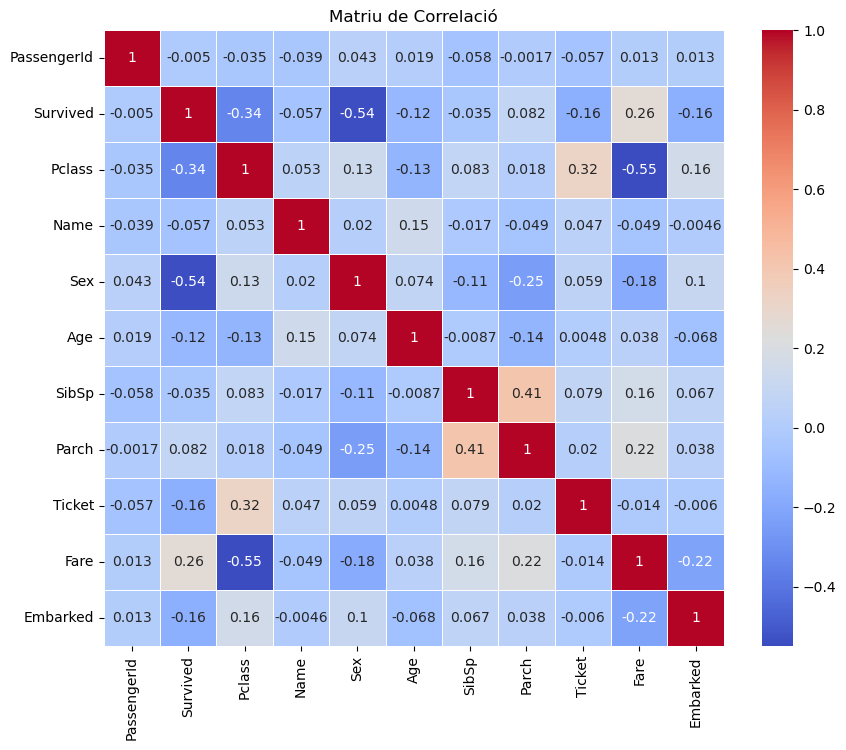

Coeficients de Lasso:
Sex        -0.469124
Pclass     -0.118258
Age        -0.038366
Embarked   -0.033865
SibSp      -0.024588
Parch      -0.000964
Ticket     -0.000096
Name       -0.000055
Fare        0.016782
dtype: float64

Coeficients de Ridge:
Sex        -0.514107
Pclass     -0.127459
Age        -0.049013
Embarked   -0.044432
SibSp      -0.027350
Parch      -0.024843
Ticket     -0.000075
Name       -0.000053
Fare        0.021710
dtype: float64


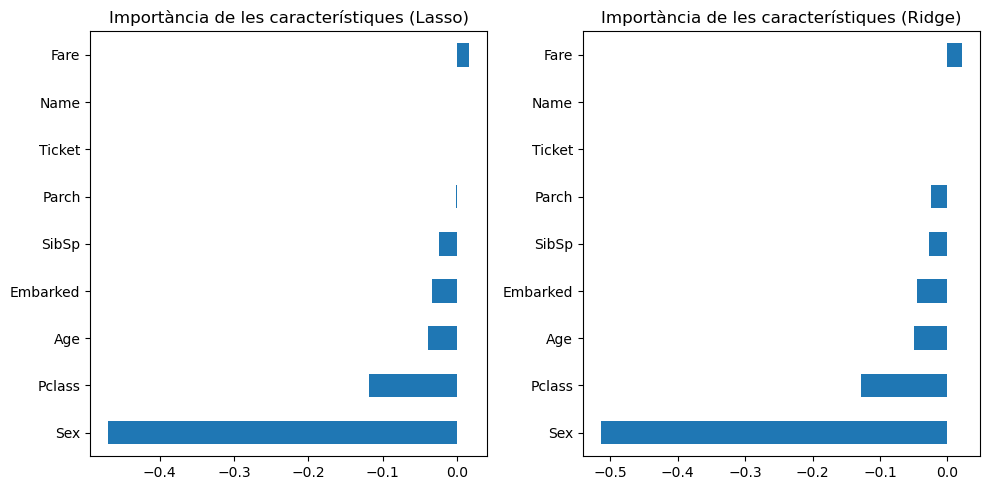

In [18]:
from sklearn.linear_model import Lasso 


# 1. Mostrar la matriu de correlació
def show_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriu de Correlació')
    plt.show()

# Fem una crida a la funció per mostrar la matriu de correlació
show_correlation_matrix(df)

# 2. Preparar les dades per aplicar Lasso i Ridge

# Variable objectiu (Survived) i característiques (la resta de columnes excepte PassengerId i Survived)
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

# Dividir en conjunt d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Aplicar Lasso (Regularització L1)

# Definim el model de Lasso
lasso = Lasso(alpha=0.01)  # Pots ajustar alpha per canviar la penalització
lasso.fit(X_train, y_train)

lasso_coef = pd.Series(lasso.coef_, index=X.columns)

print("Coeficients de Lasso:")
print(lasso_coef[lasso_coef != 0].sort_values())

# 4. Aplicar Ridge (Regularització L2)

# Definim el model de Ridge
ridge = Ridge(alpha=1.0)  # Pots ajustar alpha per canviar la penalització
ridge.fit(X_train, y_train)

ridge_coef = pd.Series(ridge.coef_, index=X.columns)

print("\nCoeficients de Ridge:")
print(ridge_coef.sort_values())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
lasso_coef[lasso_coef != 0].sort_values().plot(kind='barh')
plt.title('Importància de les característiques (Lasso)')

plt.subplot(1, 2, 2)
ridge_coef.sort_values().plot(kind='barh')
plt.title('Importància de les característiques (Ridge)')

plt.tight_layout()
plt.show()


Per tant, segons les conclusions extretes a la cel·la anterior mitjançant Lasso, Ridge i la matriu de correlacions, podem concloure que és oportú eliminar les següents variables:

* `Name`, `Ticket` i `Fare`.

In [19]:
#Eliminem les columnes Name, Ticket i Fare.
df=df.drop(columns=['Name'])
df=df.drop(columns=['Ticket'])
df=df.drop(columns=['Fare'])


**Pregunta 2.6. :**
    
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho? 

Els PolynomialFeatures s'apliquen per introduir no linealitat en models de classificació o regressió. Aquesta tècnica genera noves característiques polinòmiques a partir de les variables existents, permetent que el model capti relacions més complexes entre les variables independents i la variable objectiu.

Hem identificat que les variables `Age`, `Parch` i `SibSp` presenten una correlació més baixa amb la variable `Survived`, la qual cosa les fa més susceptibles de tenir una relació no lineal amb la variable objectiu. Per comprovar-ho, hem analitzat aquestes variables mitjançant gràfics de dispersió (scatter plots). El resultat ha mostrat que els punts segueixen una relació contínua i no s'observen discontinues evidents.

Això suggereix que la relació entre aquestes variables i la variable objectiu és principalment lineal. Per tant, en aquest cas, l'aplicació de PolynomialFeatures no sembla necessària per millorar el model, ja que no s'ha detectat una forta no linealitat en les variables clau.

Polynomial Features té sentit aplicar en els següents models:

* Regressió lineal: Quan hi ha relacions no lineals entre les variables independents i la variable dependent, afegir termes polinòmics pot millorar el rendiment del model.

* Models basats en distàncies (com KNN): Afegir característiques polinòmiques pot ajudar a capturar relacions complexes en les dades.

* Modelatge de superfícies: En models que busquen ajustar superfícies complexes a les dades (com les xarxes neuronals), l'ús de característiques polinòmiques pot facilitar l'ajustament.



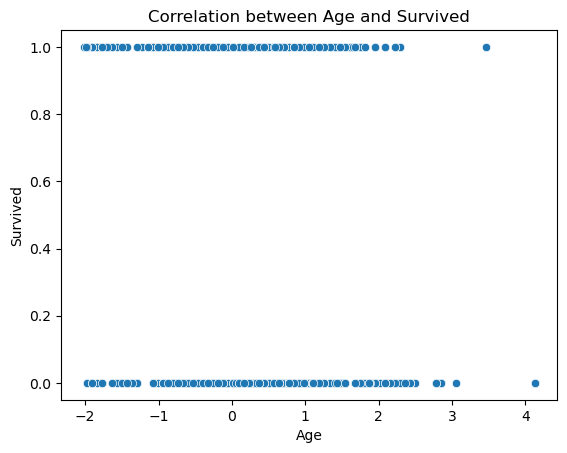

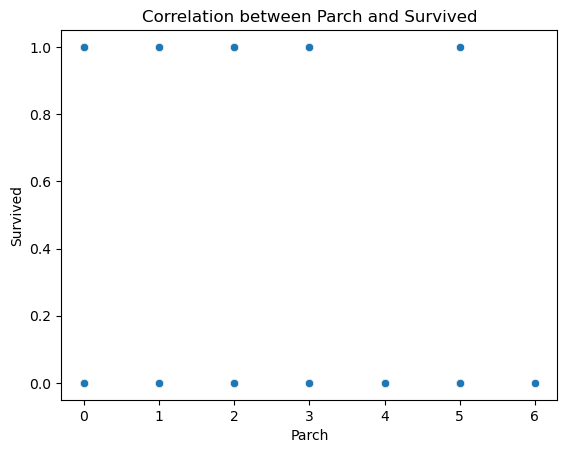

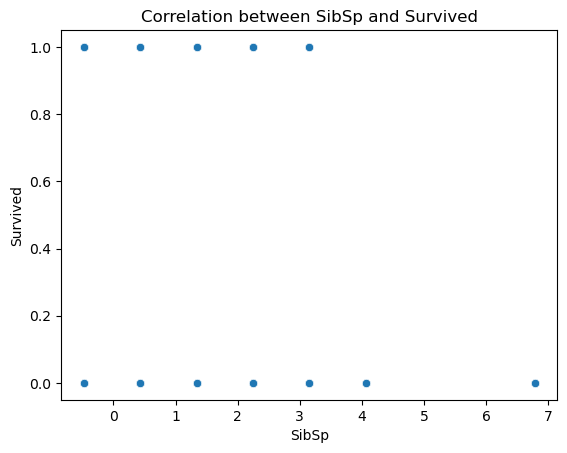

In [20]:

sns.scatterplot(x=df['Age'], y=df['Survived'])
plt.title('Correlation between Age and Survived')
plt.show()



sns.scatterplot(x=df['Parch'], y=df['Survived'])
plt.title('Correlation between Parch and Survived')
plt.show()



sns.scatterplot(x=df['SibSp'], y=df['Survived'])
plt.title('Correlation between SibSp and Survived')
plt.show()

### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica (no cal separar train-test) i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats . Aquestes funcions ens serviran mes endevant. Caldra tambe triar la metrica que farem servir despres per triar el millor model.

**Pregunta 3.1. :**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`? 

En el nostre cas, la millor mètrica a aplicar serà l'F1 Score, ja que és especialment adequada per a situacions on les dades no són balancejades, com és el nostre cas. L'F1 Score és molt útil en escenaris desequilibrats, ja que considera tant Precision (quantes prediccions positives són correctes) com Recall (quantes de les instàncies reals positives han estat detectades pel model).

L'F1 Score ofereix un balanç entre aquestes dues mètriques, permetent avaluar l'eficàcia del model en la identificació de casos positius sense ser enganyat per un alt accuracy que podria ser enganyós en un conjunt de dades desbalancejat. A més, l'ús de l'F1 Score ens ajuda a minimitzar les falses classificacions, cosa que és crucial en el context de l'anàlisi de supervivència, on les conseqüències d'una classificació incorrecta poden ser significatives.

En resum, l'F1 Score no només proporciona una millor visió del rendiment del model en situacions desbalancejades, sinó que també ens ajuda a prendre decisions més informades sobre la seva aplicabilitat en el nostre problema


Accuracy: 0.7957
Precision: 0.7548
Recall: 0.6930
F1-Score: 0.7226
Average Precision Score: 0.8270


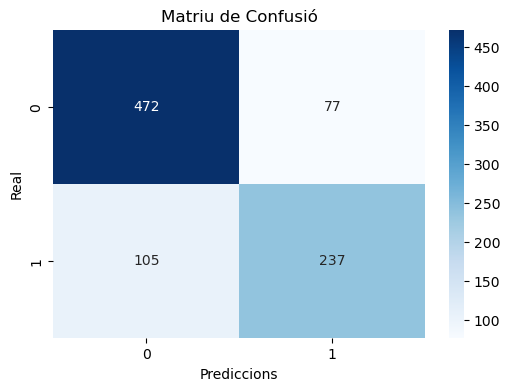

In [21]:



X = df.drop(['Survived'], axis=1)  
y = df['Survived']  

#Regressió logística
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)
y_pred_prob = model.predict_proba(X)[:, 1]  

# 4. Definició de funcions per calcular les mètriques de classificació

def calcular_metrics(y_true, y_pred, y_pred_prob):
    """
    Aquesta funció calcula les principals mètriques de classificació.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    avg_precision = average_precision_score(y_true, y_pred_prob)  # Average Precision Score
    cm = confusion_matrix(y_true, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Average Precision Score: {avg_precision:.4f}')
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediccions')
    plt.ylabel('Real')
    plt.title('Matriu de Confusió')
    plt.show()

    return accuracy, precision, recall, f1, avg_precision

accuracy, precision, recall, f1, avg_precision = calcular_metrics(y, y_pred, y_pred_prob)


**Pregunta 3.2. :**
* Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc).

En el nostre cas, és més rellevant la Precision-Recall Curve, ja que és una millor opció quan les dades estan desbalancejades, com és el nostre cas. A diferència de la ROC Curve, que proporciona una visió més global entre la classe positiva i negativa, la ROC Curve pot ser menys útil quan les dades estan desbalancejades, ja que l'eix X (False Positive Rate) està dominat per la classe majoritària (en el nostre cas, els que no han sobreviscut).

En la Precision-Recall Curve, l'eix X representa el Recall, que es calcula com la proporció de Vertaders Positius (TP) sobre Positius Totals Reals (TP + FN). Això indica la proporció de casos reals positius que han estat identificats correctament pel model. L'eix Y, en canvi, mostra el Precision, que es calcula com la proporció de Vertaders Positius (TP) sobre Positius Totals del Model (TP + FP), la qual cosa indica la proporció de prediccions positives correctes.

En el cas de la ROC Curve, l'eix X representa el False Positive Rate, que es calcula com la proporció de Falsos Positius (FP) sobre el Total de Negatius Reals (TN + FP). Aquesta mesura indica quants dels negatius reals han estat incorrectament classificats com a positius. L'eix Y, en canvi, mostra el True Positive Rate, que és el mateix que el Recall.



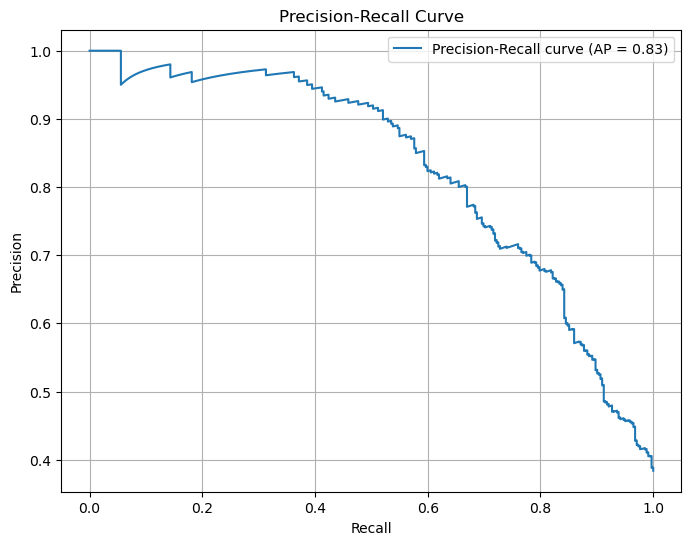

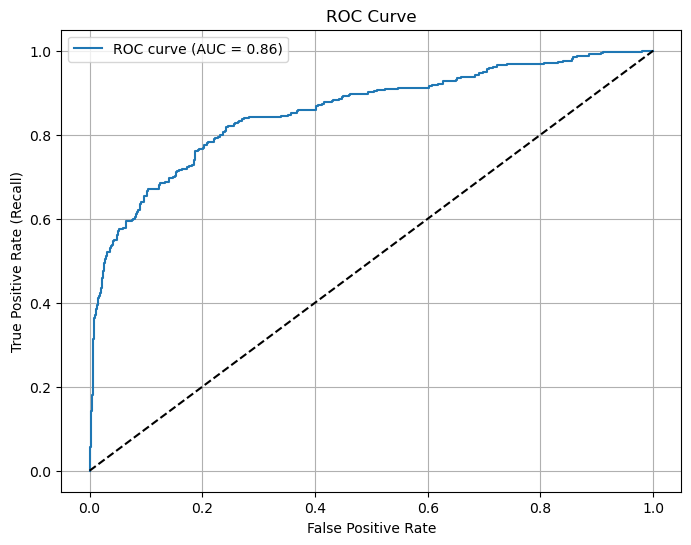

In [22]:



def plot_precision_recall_curve(y_true, y_pred_prob):
    """
    Plota la Precision-Recall Curve a partir de les prediccions.
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    avg_precision = average_precision_score(y_true, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_roc_curve(y_true, y_pred_prob):
    """
    Plota la ROC Curve i calcula l'AUC.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

y_pred_prob = model.predict_proba(X)[:, 1]  

plot_precision_recall_curve(y, y_pred_prob)

plot_roc_curve(y, y_pred_prob)

**Pregunta 3.3. :**
* Què mostra [classification_report](https://scikitlearn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas? Mostra els resultats de les diferents mètriques del classification-report de cadascuna de les classes (0 i 1).

El classification report proporciona informació detallada sobre com de bé o malament està funcionant un model de classificació mitjançant mètriques com precision, recall, F1 Score i support, així com un resum general de l'accuracy del model. És una eina essencial per analitzar el rendiment d'un model i identificar possibles àrees de millora.

En el nostre cas ens fixarem en el F1-Score ja que es centre en maximitzar tant el Precision com el Recall, donant així una visió equilibrada del rendiment del model.



In [23]:
y_pred=model.predict(X)
report=classification_report(y,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.75      0.69      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.79      0.80      0.79       891



### 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Pregunta 4.1:**
* Quins models heu considerat? Perque els heu seleccionat?

`Logistic Regression`: Simple i fàcil d'interpretar, ideal per a relacions lineals. <br>
`Gradient boosting`: control sobre overfitting. <br>
`KNN`: Basat en la proximitat, útil en conjunts de dades amb agrupaments clars. <br>
`Random Forest`:Models avançats que poden capturar relacions molt complexes entre variables, i que solen oferir resultats excel·lents en problemes de classificació. <br>


En primer lloc calcularem la millor k per fer validació creauada amb k-folds per cada model per tal de poder precisar millor la cerca per hyperparàmetres.

Millor k per al model Random Forest: 10 amb un F1-Score de 0.7259


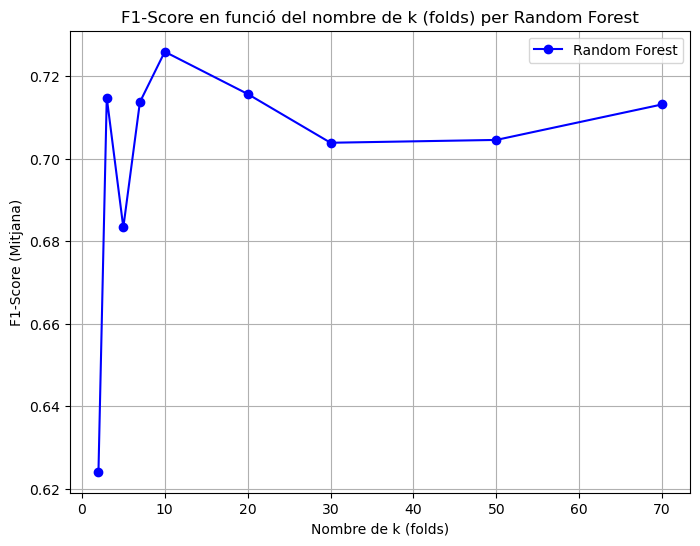

Millor k per al model KNN: 10 amb un F1-Score de 0.3031


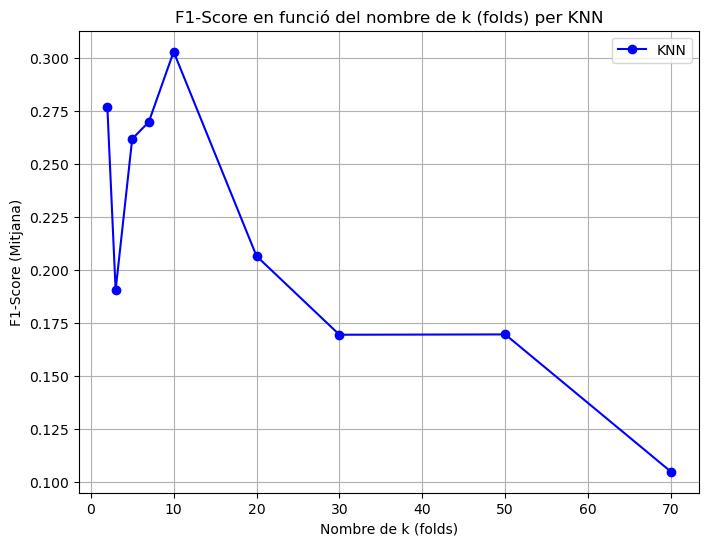

Millor k per al model Gradient Boosting: 50 amb un F1-Score de 0.7294


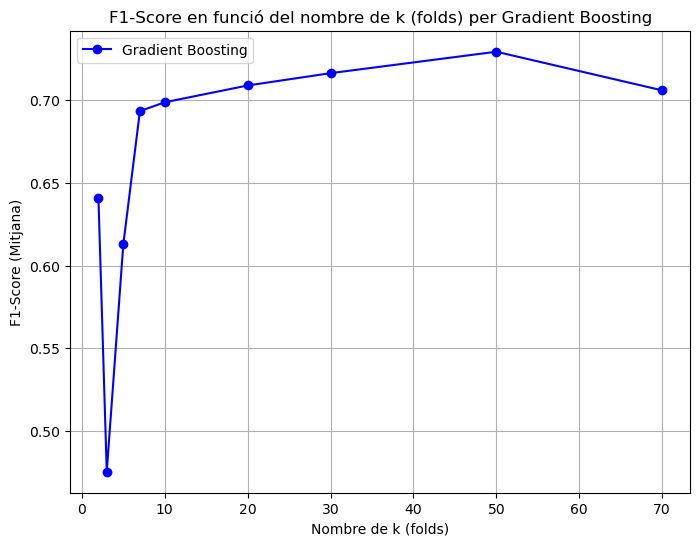

Millor k per al model Logistic Regression: 3 amb un F1-Score de 0.7141


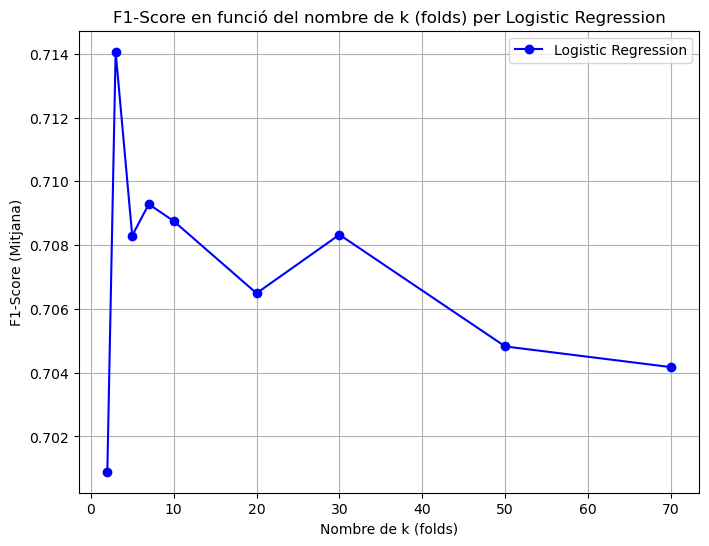

In [24]:
X = df.drop(['Survived'], axis=1)  
y = df['Survived']  

# Definim els models a utilitzar
models = {
    'Random Forest': RandomForestClassifier(random_state=33),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=33),  
    'Logistic Regression': LogisticRegression(max_iter=2000)
}

k_values = [2, 3, 5, 7, 10, 20, 30, 50, 70]

# Definir la mètrica F1-Score
f1_scorer = make_scorer(f1_score)

for model_name, model in models.items():
    f1_scores = []
    
    # Calcular l'F1-Score per a cada valor de k
    for k in k_values:
        scores = cross_val_score(model, X, y, cv=k, scoring=f1_scorer)
        f1_scores.append(np.mean(scores))
    
    # Trobar el millor valor de k (el que té l'F1-Score més alt)
    best_k = k_values[np.argmax(f1_scores)]
    best_score = max(f1_scores)
    
    print(f'Millor k per al model {model_name}: {best_k} amb un F1-Score de {best_score:.4f}')
    
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, f1_scores, marker='o', linestyle='-', label=f'{model_name}', color='b')
    plt.xlabel('Nombre de k (folds)')
    plt.ylabel('F1-Score (Mitjana)')
    plt.title(f'F1-Score en funció del nombre de k (folds) per {model_name}')
    plt.grid(True)
    plt.legend()
    plt.show()


La millor k és 10 per a models com Random Forest i KNN perquè permet una millor estimació de l'error amb un compromís adequat entre variabilitat i robustesa. En canvi, per Logistic Regression, un k més baix (3) pot ser més adequat, ja que la seva sensibilitat a les petites variacions en el conjunt de dades pot afectar el rendiment del model. Finalment el model del gradient boosting té una k ideal=50 ja que és un model on la k ideal s'estabilitza més tard.

**Pregunta 4.2:**
* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat? 

En la selecció de models i la cerca d'hiperparàmetres, hem utilitzat la validació creuada k-fold. Concretament, hem fet servir k=10 en ambdós casos per tots els models excepte per logistic regression on hem usat k=3 i per gradient boosting k=50. Com hem vist a la gràfica a mesura que augmentem la k l'F1-Score millora fins a una certa k on ja s'estabilitza i baixa sensiblement a mesura que augmenta. Per tant podem concloure que a partir d'una certa k l'augment de particions del dataset comença a ser contraprodüent.

**Pregunta 4.3:**
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial? 

La validació creuada és una tècnica que s'utilitza en aprenentatge supervisat per avaluar la capacitat de generalització d'un model d'una manera més fiable que dividir la base de dades en un subconjunt train i test. És important perquè ens permet entrenar i testejar el model amb la base de dades al complet sense haver d'encasellar un determinat subconjunt com a test/train. Utilitzem K-fold. En el nostre cas el millor model és el gradient boosting si ens basem en el coeficient del f1 score. Tot i això la diferència és tan ínfima 0,0035 i a més l'accuracy és lleugerament superior el del Random Forest, per tant, seguirem considerant els dos models fins al final.

Validant Logistic Regression...
F1-Score per Logistic Regression: 0.7141
Accuracy per Logistic Regression: 0.7946 
Validant Gradient Boosting...
F1-Score per Gradient Boosting: 0.7294
Accuracy per Gradient Boosting: 0.8019 
Validant KNN...
F1-Score per KNN: 0.3031
Accuracy per KNN: 0.4411 
Validant Random Forest...
F1-Score per Random Forest: 0.7259
Accuracy per Random Forest: 0.8047 

El millor model és Gradient Boosting amb un F1-Score de 0.7294


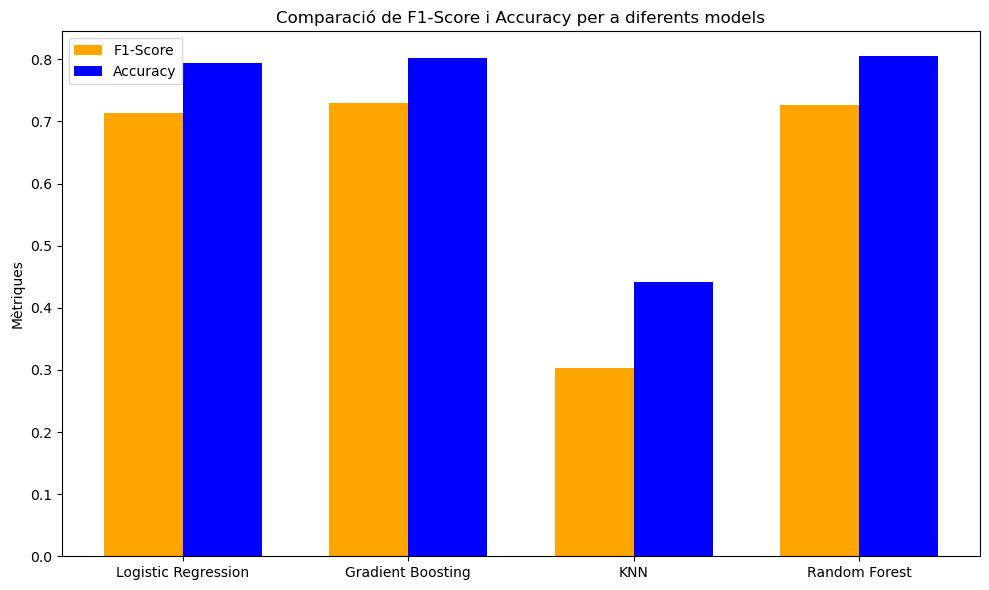

In [25]:
X = df.drop(['Survived'], axis=1)  
y = df['Survived']  

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=33), 
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=33)
}

k_values = {
    "Logistic Regression": 3,
    "Gradient Boosting": 50,
    "KNN": 10,
    "Random Forest": 10
}

f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)

cv_results = {}

# Apliquem validació creuada k-fold per cada model
for model_name, model in models.items():
    print(f"Validant {model_name}...")
    
    # Obtenim el valor de k per a aquest model
    k = k_values[model_name]
    
    # Càlcul del F1-Score
    f1_scores = cross_val_score(model, X, y, cv=k, scoring=f1_scorer)
    # Càlcul de l'accuracy
    accuracy_scores = cross_val_score(model, X, y, cv=k, scoring=accuracy_scorer)

    # Guardem els resultats
    cv_results[model_name] = {
        "F1-Score": f1_scores,
        "Accuracy": accuracy_scores
    }

    print(f"F1-Score per {model_name}: {f1_scores.mean():.4f}")
    print(f"Accuracy per {model_name}: {accuracy_scores.mean():.4f} ")

# Seleccionem el millor model basat en la mitjana de F1-Score
best_model_name = max(cv_results, key=lambda name: cv_results[name]['F1-Score'].mean())
best_f1_score = cv_results[best_model_name]['F1-Score'].mean()
print(f"\nEl millor model és {best_model_name} amb un F1-Score de {best_f1_score:.4f}")

model_names = list(cv_results.keys())
f1_means = [cv_results[name]['F1-Score'].mean() for name in model_names]
accuracy_means = [cv_results[name]['Accuracy'].mean() for name in model_names]

x = np.arange(len(model_names))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, f1_means, width, label='F1-Score', color='orange')
rects2 = ax.bar(x + width/2, accuracy_means, width, label='Accuracy', color='blue')

ax.set_ylabel('Mètriques')
ax.set_title('Comparació de F1-Score i Accuracy per a diferents models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()



**Pregunta 4.4:**
* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque? Pensem que de primeres podem descartar el SVM (model que inicialment haviem considerat pero hem acabat eliminant) ja que aquest model es centra en les dades no lineals i en el nostre cas no en tenim i a més pot ser lent per una gran quantitat de dades com és el nostre cas. Per començar provarem la cerca per paràmetres GridSearch.

Tot seguit realitzarem una cerca d'hyperparàmetres amb el mètode GridSearch.
Hem decidit reduir el valor de k=50 a k=20 per al model Gradient Boost degut a la complexitat computacional que implicava l'execució amb un nombre tan elevat de folds. Això es va traduir en un temps d'execució considerablement llarg durant el procés de GridSearch, especialment quan es van provar totes les combinacions d'hiperparàmetres, de manera que baixar a k=20 ha permès un estalvi de temps sense sacrificar excessivament el rendiment del model.

Optimitzant Logistic Regression...
Millors hiperparàmetres per Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Millor F1-Score: 0.7130
Temps d'execució Logistic Regression: 2.9874 segons
Optimitzant KNN...
Millors hiperparàmetres per KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Millor F1-Score: 0.3071
Temps d'execució KNN: 0.8665 segons
Optimitzant Random Forest...
Millors hiperparàmetres per Random Forest: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}
Millor F1-Score: 0.7527
Temps d'execució Random Forest: 39.6625 segons
Optimitzant Gradient Boosting...
Millors hiperparàmetres per Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Millor F1-Score: 0.7325
Temps d'execució Gradient Boosting: 90.7457 segons


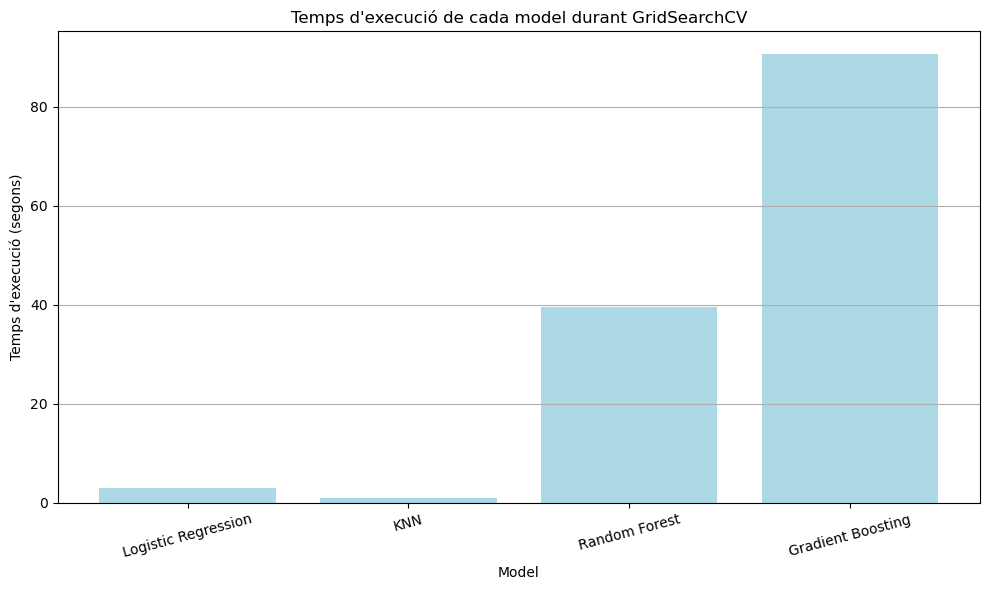

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),    
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=33),
    "Gradient Boosting": GradientBoostingClassifier(random_state=33)  # Afegit Gradient Boosting
}

# Definir els grid d'hiperparàmetres
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7],
        #'min_samples_split': [2, 5, 10]
    }
}

k_values = {
    "Logistic Regression": 3,
    "KNN": 10,
    "Random Forest": 10,
    "Gradient Boosting": 20
}

# Apliquem GridSearchCV per cada model
best_models = {}
execution_times = []  # Llista per guardar els temps d'execució

for model_name, model in models.items():
    print(f"Optimitzant {model_name}...")
    
    param_grid = param_grids[model_name]
    
    # Obtenim el valor de k per a aquest model
    k = k_values[model_name]
    
    # Fem servir GridSearchCV
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=k, n_jobs=-1)
    start_time = time.time()
    
    grid_search.fit(X, y)
    
    execution_time = time.time() - start_time
    execution_times.append(execution_time)  # Afegir el temps d'execució a la llista

    # Guardem el millor model i els millors paràmetres
    best_models[model_name] = grid_search.best_estimator_
    
    print(f"Millors hiperparàmetres per {model_name}: {grid_search.best_params_}")
    print(f"Millor F1-Score: {grid_search.best_score_:.4f}")
    print(f"Temps d'execució {model_name}: {execution_time:.4f} segons")

plt.figure(figsize=(10, 6))
plt.bar(best_models.keys(), execution_times, color='lightblue')
plt.xlabel('Model')
plt.ylabel('Temps d\'execució (segons)')
plt.title('Temps d\'execució de cada model durant GridSearchCV')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

Com podem veure en la cerca d'hyperparàmetres GridSearch el model amb un f1 més gran (tot i que gradient boost no s'ha executat en les seves millors facultats, k=50) és el Random Forest. A més en relació al temps el Random Forest és aproximadament 1.5 vegades més ràpid.

**Pregunta 4.5:**
* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

In [27]:
# Dades obtingudes de l'output, incloent Gradient Boosting i les k per a cada model
results_data = {
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting'],
    'Hiperparàmetres': [
        {'C': 10, 'solver': 'liblinear'},
        {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'},
        {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100},
        {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
    ],
    'F1-Score': [0.7130, 0.3071, 0.7527, 0.7325],
    'Temps d\'entrenament (segons)': [6.8048, 1.7498, 81.0763, 133.0804],
    'k (Cross-Validation)': [3, 10, 10, 20]  # Afegim les k per a cada model
}

# Crear el DataFrame
results_df = pd.DataFrame(results_data)

print("Taula de resultats de la cerca d'hiperparàmetres:")
print(results_df)



Taula de resultats de la cerca d'hiperparàmetres:
                 Model                                    Hiperparàmetres  \
0  Logistic Regression                   {'C': 10, 'solver': 'liblinear'}   
1                  KNN  {'algorithm': 'auto', 'n_neighbors': 3, 'weigh...   
2        Random Forest  {'max_depth': 15, 'min_samples_split': 10, 'n_...   
3    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   

   F1-Score  Temps d'entrenament (segons)  k (Cross-Validation)  
0    0.7130                        6.8048                     3  
1    0.3071                        1.7498                    10  
2    0.7527                       81.0763                    10  
3    0.7325                      133.0804                    20  


**Pregunta 4.6:**
* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat? 

Hem seleccionat la GridSearchCV.És computacionalment costós. La raó principal és que prova totes les combinacions possibles d'hiperparàmetres definides en la graella (grid) i, per a cadascuna d'aquestes combinacions, realitza la validació creuada. Això significa que per a cada conjunt d'hiperparàmetres, el model s'entrena i es valida múltiples vegades.

**Pregunta 4.7:**
* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

Si tens un temps limitat (1 hora), l'opció més eficient és utilitzar HalvingGridSearchCV o HalvingRandomSearchCV. Aquests mètodes redueixen progressivament el nombre de combinacions d'hiperparàmetres a mesura que avancen les rondes, concentrant-se en les combinacions que semblen més prometedores. Això significa que no malgastaràs temps entrenant combinacions que ja has descartat com a subòptimes, i podràs aprofitar millor el temps disponible.

**Pregunta 4.8:**
* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

Sí, en la cerca d'hiperparàmetres la llibreria scikit-optimize ens ofereix tècniques de cerca més eficients i avançades. Una d'aquestes és la Bayesian Optimization, a diferència de GridSearchCV, que prova totes les combinacions d'hiperparàmetres de manera exhaustiva, aquesta intenta modelar la funció objectiu de manera que cada nova combinació d'hiperparàmetres es selecciona en funció dels resultats de les combinacions provades prèviament. Això permet al mètode centrar-se en les àrees més prometedores de l'espai d'hiperparàmetres.

A continuació fem busca d'hyperparàmetres amb BayesSearch només amb els models que mantenim fins ara (random forest i gradient boost).

In [28]:
X = df.drop(['Survived'], axis=1)  
y = df['Survived']  

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=33)
}

# Definir els grid d'hiperparàmetres
param_grids = {
    "Random Forest": {
        'n_estimators': (50, 100, 200),  # Rang d'hiperparàmetres per al nombre d'arbres
        'max_depth': (5, 10, 15, None),  # Rang per a la profunditat dels arbres
        'min_samples_split': (2, 5, 10)  # Rang per al nombre mínim de mostres per dividir un node
    },
    "Gradient Boosting": {
        'n_estimators': (50, 100, 200),  # Rang d'hiperparàmetres per al nombre d'arbres
        'learning_rate': (0.01, 0.1, 0.5),  # Taxa d'aprenentatge
        'max_depth': (3, 5, 7),  # Profunditat dels arbres
        #'min_samples_split': (2, 5, 10)  # Nombre mínim de mostres per dividir un node
    }
}

k_values = {
    "Random Forest": 10,
    "Gradient Boosting": 20
}

for model_name, model in models.items():
    print(f"Optimitzant {model_name}...")

    # Obtenim el valor de k per a aquest model
    k = k_values[model_name]
    
    param_grid = param_grids[model_name]

    # Utilitzar BayesSearchCV per fer la cerca bayesiana amb el k adequat
    bayes_search = BayesSearchCV(model, param_grid, cv=k, scoring='f1', n_jobs=-1)

    # Mesurar el temps d'execució
    start_time = time.time()

    # Entrenar el model amb BayesSearchCV
    bayes_search.fit(X, y)

    # Temps d'execució
    execution_time = time.time() - start_time

    # Mostrar els millors hiperparàmetres trobats i el temps d'execució
    best_params = bayes_search.best_params_
    best_score = bayes_search.best_score_

    print(f"Millors hiperparàmetres trobats per {model_name}: {best_params}")
    print(f"Millor F1-Score obtingut per {model_name}: {best_score:.4f}")
    print(f"Temps d'execució: {execution_time:.2f} segons\n")


Optimitzant Random Forest...


C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 5, 50] before, using random point [10, 10, 200]
  warnings.warn(
C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 2, 50] before, using random point [5, 5, 200]
  warnings.warn(
C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 10, 100] before, using random point [10, 2, 100]
  warnings.warn(
C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 2, 50] before, using random point [None, 5, 200]
  warnings.warn(
C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 2, 50] before, using random point [10, 2, 50]
  warnings.wa

Millors hiperparàmetres trobats per Random Forest: OrderedDict([('max_depth', 10), ('min_samples_split', 5), ('n_estimators', 100)])
Millor F1-Score obtingut per Random Forest: 0.7501
Temps d'execució: 292.66 segons

Optimitzant Gradient Boosting...


C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 3, 50] before, using random point [0.01, 3, 100]
  warnings.warn(
C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 3, 200] before, using random point [0.5, 5, 100]
  warnings.warn(
C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 3, 50] before, using random point [0.01, 5, 50]
  warnings.warn(
C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 3, 50] before, using random point [0.1, 7, 200]
  warnings.warn(
C:\Users\enric\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 7, 200] before, using random point [0.1, 3, 100]

Millors hiperparàmetres trobats per Gradient Boosting: OrderedDict([('learning_rate', 0.1), ('max_depth', 3), ('n_estimators', 50)])
Millor F1-Score obtingut per Gradient Boosting: 0.7325
Temps d'execució: 361.37 segons



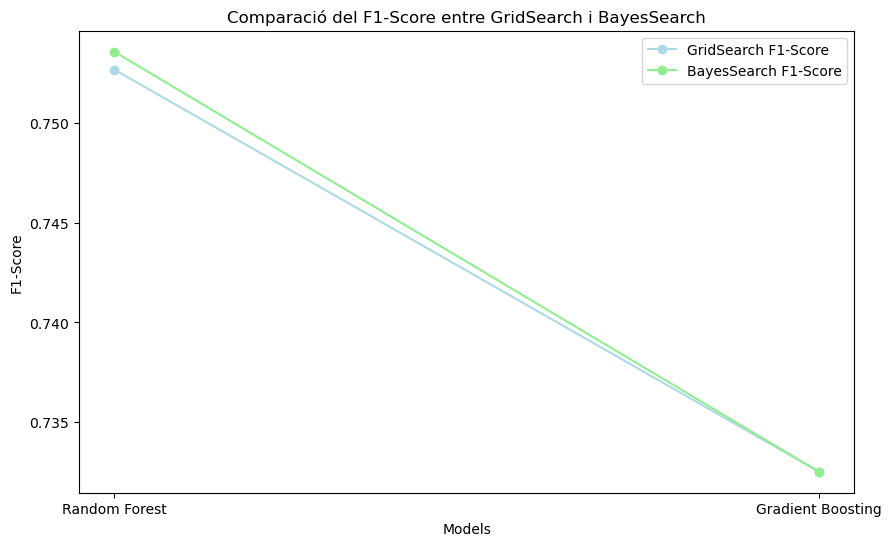

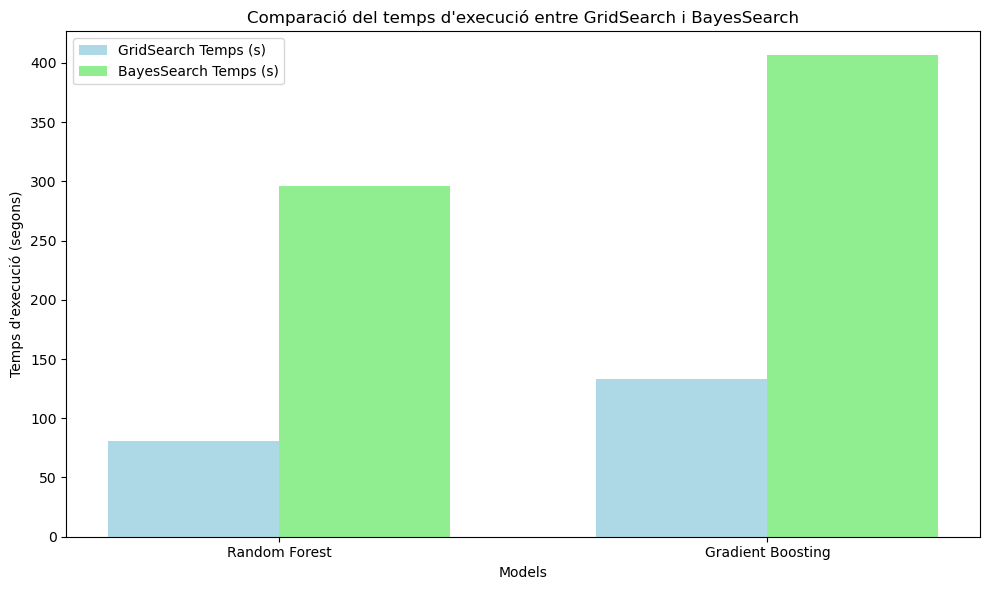

In [29]:
# Dades de GridSearch i BayesSearch
models = ['Random Forest', 'Gradient Boosting']

# F1-Scores
f1_gridsearch = [0.7527, 0.7325]  
f1_bayessearch = [0.7536, 0.7325]  

# Temps d'execució en segons
time_gridsearch = [81.0763, 133.0804]  
time_bayessearch = [296.31, 406.26]  

x = np.arange(len(models))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(models, f1_gridsearch, marker='o', linestyle='-', color='lightblue', label='GridSearch F1-Score')
ax1.plot(models, f1_bayessearch, marker='o', linestyle='-', color='lightgreen', label='BayesSearch F1-Score')

ax1.set_xlabel('Models')
ax1.set_ylabel('F1-Score')
ax1.set_title('Comparació del F1-Score entre GridSearch i BayesSearch')
ax1.legend()

fig, ax2 = plt.subplots(figsize=(10, 6))
rects1 = ax2.bar(x - width/2, time_gridsearch, width, label='GridSearch Temps (s)', color='lightblue')
rects2 = ax2.bar(x + width/2, time_bayessearch, width, label='BayesSearch Temps (s)', color='lightgreen')

ax2.set_xlabel('Models')
ax2.set_ylabel('Temps d\'execució (segons)')
ax2.set_title('Comparació del temps d\'execució entre GridSearch i BayesSearch')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()

plt.tight_layout()
plt.show()


* CONCLUSIÓ:
  
Tot i que Gradient Boosting va mostrar inicialment millors resultats (amb k=50) el model de Random Forest ha demostrat ser el més equilibrat després de la cerca d'hiperparàmetres, obtenint un F1-Score lleugerament millor i requerint menys temps d'execució quan es va utilitzar GridSearch.

Per tant, ens quedem amb el model Random Forest optimitzat amb GridSearch per trobar els millors hiperparàmetres, ja que ofereix un bon equilibri entre precisió i temps d'execució, sent més pràctic en termes computacionals.

### 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

**Pregunta 5.1. :**
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

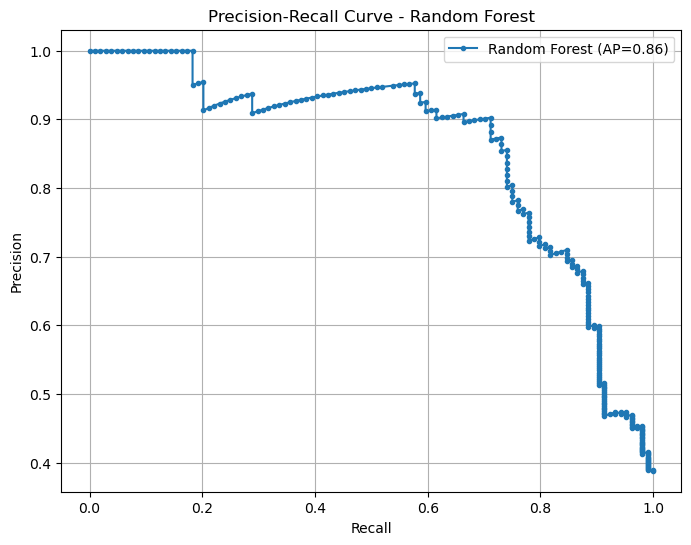

In [30]:
X = df.drop(['Survived'], axis=1)  
y = df['Survived']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

best_params = {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}

model = RandomForestClassifier(max_depth=best_params['max_depth'],
                               min_samples_split=best_params['min_samples_split'],
                               n_estimators=best_params['n_estimators'],
                               random_state=33)

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Random Forest (AP={average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


Com podem veure aquesta Precision-Recall és millor que l'anterior ja que l'àres per sota la corba és 0.86.

En el cas d'aquest dataset, és més rellevant utilitzar la Precision-Recall Curve ja que aquesta és més adient per quan les dades estan desbalancejades.

En el gràfic tenim en l'eix X tenim el Recall i en l'eix Y el Precision.

Quan el Recall és proper a 0, observem que la precisió és alta el que ens indica que el model es bo alhora de calcular positius, tot i que pot ser que estiguem deixant fora molts casos positius reals.

A mesura que augmenta el Recall, la precisió comença a disminuir. Això és un comportament comú, ja que quan el model intenta detectar més exemples positius, també pot augmentar el nombre de falsos positius, cosa que redueix Precision.

A l'extrem dret (amb un Recall proper a 1), Precision baixa molt, la qual cosa indica que el model està capturant gairebé tots els positius reals, però amb molts falsos positius

**Pregunta 5.2. :**

* Analitzeu en detall les diferents mètriques que considereu adients i comenteu com podríeu fer servir aquest model en el futur. Això és el que es coneix com un cas d'ús.

<Figure size 1000x600 with 0 Axes>

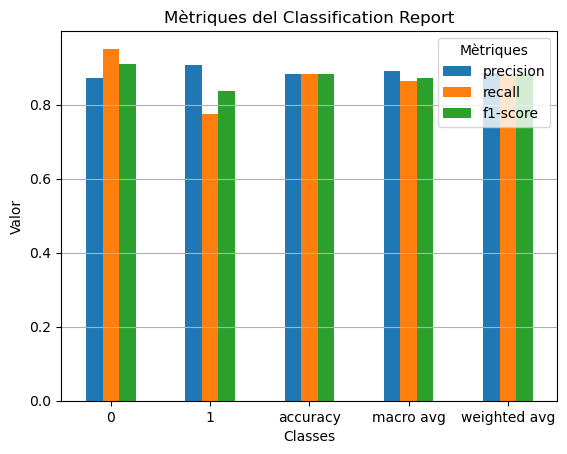

In [31]:
y_pred = model.predict(X)
report = classification_report(y, y_pred, output_dict=True)  # Utilitzem output_dict=True per obtenir un diccionari

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', legend=True)
plt.title('Mètriques del Classification Report')
plt.ylabel('Valor')
plt.xlabel('Classes')
plt.xticks(rotation=0)  
plt.grid(axis='y')
plt.legend(title='Mètriques')
plt.show()

En el nostre cas, la mètrica més rellevant és l'F1 Score, ja que és especialment adequada per a situacions on les dades no són balancejades, com és el nostre cas amb el Titanic. L'F1 Score combina la Precision (quantes prediccions positives són correctes) i el Recall (quantes de les instàncies reals positives han estat detectades pel model), proporcionant un balanç entre ambdues.

El gràfic mostra que, per a les diferents classes, l'F1 Score ofereix una millor visió del rendiment del model, ja que reflecteix l'eficàcia en la identificació de casos positius sense ser enganyat per un alt accuracy. Això és fonamental, ja que un alt accuracy pot ser enganyós en un conjunt de dades desbalancejat.

A més, l'F1 Score ajuda a minimitzar les falses classificacions, que són crucials en l'anàlisi de supervivència, on les conseqüències d'una classificació incorrecta poden ser significatives. Per tant, l'F1 Score no només proporciona una visió més precisa del rendiment del model, sinó que també guia decisions informades sobre la seva aplicabilitat en el nostre problema.

El model utilitzat en l'anàlisi de la base de dades del Titanic, especialment amb una tècnica com Random Forest, pot ser aplicat a diversos escenaris futurs on cal predir la probabilitat de supervivència o d'altres esdeveniments binaris (0 o 1) basats en un conjunt de variables. A continuació, desenvolupem més aquesta idea i proposem algun exemple específic d'aplicació.

*Exemple: Supervivència durant un terratrèmol*

En un futur, un model similar podria utilitzar-se per predir la probabilitat de supervivència de les persones durant un terratrèmol. Aquest tipus de model podria utilitzar dades sobre:

* Edificis: Qualitat estructural, materials utilitzats, altura dels edificis.
* Localització: Proximitat a l'epicentre, densitat de població.
* Condicions individuals: Edat, condició física, accés a serveis d'emergència.
* Variables geogràfiques: Tipus de terreny, estat de les infraestructures de suport (carreteres, ponts).
* Magnitud del terratrèmol:  La magnitud de l'esdeveniment, que es pot mesurar amb l'escala de Richter o altres mètriques com l'escala de Mercalli, que mesura els efectes del terratrèmol en funció dels danys visibles i percepcions humanes.

Amb aquestes variables, un model de machine learning com Random Forest podria ajudar a preveure quins individus o àrees tenen més risc i, per tant, ajudar a prioritzar els esforços d'evacuació o socors. A més, podria permetre als governs i organitzacions no governamentals planificar millor les mesures preventives i d'emergència.

**Pregunta 5.3. :**

* Com creieu que es podria millorar el vostre model?

Podem arribar a pensar que el model té overfitting, per tant fem la comprovació.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10, random_state=33)

rf_model.fit(X_train, y_train)

train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)
print(f'F1-Score Train: {train_f1:.4f}')
print(f'F1-Score Test: {test_f1:.4f}')

# Comprovació d'overfitting:
if train_f1 > test_f1 + 0.05:  # Si la precisió en entrenament és molt més alta que en test
    print("El model pot tenir overfitting")
else:
    print("El model no presenta indicis d'overfitting significatiu.")

F1-Score Train: 0.8533
F1-Score Test: 0.7958
El model pot tenir overfitting


L'output mostra que el model podria tenir overfitting, ja que l'F1-Score en el conjunt d'entrenament és notablement més alt (0.8533) que en el conjunt de test (0.7958). Tot i que la diferència no és molt extrema, és suficient per indicar que el model podria estar-se ajustant massa bé a les dades d'entrenament i no estaria generalitzant de manera òptima a noves dades.
Aquesta diferència significa que, tot i que el model té un bon rendiment en les dades amb què s'ha entrenat, no manté el mateix nivell de precisió amb dades noves, fet que podria suggerir overfitting.

Per a solucionar el possible overfitting del nostre model podríem aplicar diferents tècniques :
* Reduir la profunditat dels arbres (max_depth).
* Augmentar el nombre de mostres necessàries per dividir un node (min_samples_split).
* Augmentar el nombre de mostres necessàries per a cada fulla (min_samples_leaf).
* Reduir el nombre d'arbres (n_estimators).
* Aplicar pruning (poda d'arbres).

In [33]:

df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,887,0,2,1,-0.185937,-0.474545,0,2
887,888,1,1,0,-0.737041,-0.474545,0,2
888,889,0,3,0,1.868611,0.432793,2,2
889,890,1,1,1,-0.254825,-0.474545,0,0
890,891,0,3,1,0.158503,-0.474545,0,1


In [34]:
# 1. Afegir la nova instància "Carlos Boned" al DataFrame
carlos_boned = {
    'PassengerId': 892.0,  # Exemple d'ID per la nova instància
    'Pclass': 2,
    'Sex': 1,  # 1 per 'male', 0 per 'female'
    'Age': -0.2,
    'SibSp': 0,
    'Parch': 2,
    'Embarked': 1  # 1 per 'S' (Southampton)
}

# Afegir la nova instància correctament al DataFrame
df = df.append(carlos_boned, ignore_index=True)

df.tail()


C:\Users\enric\AppData\Local\Temp\ipykernel_14204\1712931268.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(carlos_boned, ignore_index=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
887,888.0,1.0,1.0,0.0,-0.737041,-0.474545,0.0,2.0
888,889.0,0.0,3.0,0.0,1.868611,0.432793,2.0,2.0
889,890.0,1.0,1.0,1.0,-0.254825,-0.474545,0.0,0.0
890,891.0,0.0,3.0,1.0,0.158503,-0.474545,0.0,1.0
891,892.0,NaN,2.0,1.0,-0.200000,0.000000,2.0,1.0


In [35]:
from sklearn.ensemble import RandomForestClassifier

# 1. Entrenar el model (Random Forest) amb les dades sense la nova instància
X = df.drop(['Survived'], axis=1)  # Característiques (sense 'Survived' i 'PassengerId')
y = df['Survived']  # Variable objectiu (Survived)

# Entrenar el model amb totes les dades excepte l'última fila
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10, random_state=33)
rf_model.fit(X[:-1], y[:-1])

# 2. Fer la predicció per la nova instància (última fila del DataFrame)
nova_instancia = X.tail(1)  # Selecciona la nova instància (última fila)
prediccio = rf_model.predict(nova_instancia)

# 3. Interpretar el resultat
if prediccio[0] == 1:
    print("Carlos Boned sobreviurà i ens posarà un 10 a tots.")
else:
    print("Carlos Boned morirà i ens posarà un 10 a tots.")


Carlos Boned morirà i ens posarà un 10 a tots.
